各種ライブラリが必要となるため、プログラム実行時はインストールすること

py -m pip install <ライブラリ>

In [133]:
# 事前準備
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
plt.style.use("ggplot")
%matplotlib inline

# 少数第3位まで表示
%precision 3

# グラフの日本語表記対応
import japanize_matplotlib

# 第３章 機械学習

## 3-1 機械学習の基礎

**機械学習**とは、「コンピュータにデータを学習させ、データに潜むパターンを発見し、予測させる」ことである。

機械学習の種類は4つあり、それぞれを説明する。

1. 教師あり学習
1. 教師なし学習
1. 半教師あり学習
1. 強化学習

![機械学習とは](./img/機械学習とは.png)

## 3-2 教師あり学習

教師あり学習とは、入力データと正解データが対応付けされた教師データをコンピュータに与えることで、機械学習のモデルを学習させていく手法である。

教師あり学習には、予測する出力地の形式の違いにより2つの種類がある。

|種類|出力値の形式|例|
|---|---|---|
|回帰(regression)問題|連続値|過去の売上データを基に、将来の売上金額を予測|
|分類(classification)問題|カテゴリ(連続でない値)|動物の画像データを基に、動物の種類を識別する|

教師あり学習の主な手法を以下にまとめ、それぞれを説明する。

|手法|種類|
|---|---|
|線形回帰(linear regression)|回帰問題|
|ロジスティク回帰(logistic regression)|分類問題|
|サポートベクトルマシン(Suport Vector Machine:SVM)|回帰/分類問題|
|決定木(Decision Tree)|回帰/分類問題|
|アンサンブル学習(ランダムフォレスト)|回帰/分類問題|
|アンサンブル学習(勾配ブースティング)|回帰/分類問題|
|ニューラルネットワーク|回帰/分類問題|
|ベイジアン学習|回帰/分類問題|
|クラスタリング(k近傍法[k-NN法])|回帰/分類問題|

### 3-2-1 線形回帰

**線形回帰**は、1つ以上の説明変数を使用して、連続値の目的変数を予測するための手法である。

|変数|説明|
|---|---|
|説明変数|目的変数の原因となっている変数|
|目的変数|予測したい値|

1つの説明変数を利用して目的変数を求める方法を**単回帰分析**といい、2つ以上の説明変数から目的変数を求める方法を**重回帰分析**という。

#### 3-2-1-1 単回帰分析

In [2]:
#####################################################
# 解析データ準備                                    #
#####################################################

import requests, zipfile
from io import StringIO
import io

# データがあるurlの指定
# 今回、データサイエンス育成講座(書籍)をサンプルとして利用
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データを取得
r = requests.get(url, stream=True)

# zipファイルのため、展開する(実行環境配下のdataフォルダ)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(path='data/')

In [5]:
# データの中身を確認する
student_data_math = pd.read_csv('data/student-mat.csv')

# 数行確認
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [6]:
# 区切り文字が「;」なので、再読み込み
student_data_math = pd.read_csv('data/student-mat.csv', sep=';')

# 数行確認
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

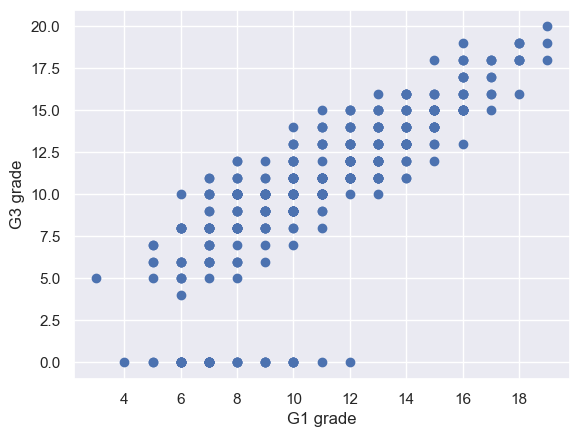

In [7]:
################################################################
# 単回帰分析                                                   #
# 学生データの、一期目の数学の成績と最終期の数学の成績         #
# から関連性を調べる                                           #
################################################################

# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [11]:
################################################################
# 単回帰分析                                                   #
# 回帰係数・切片を求める                                       #
################################################################

# Scikit-learnライブラリを利用する
# これを用いることで簡単に計算することが可能
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

# 説明変数には一期目の数学の成績を設定
X = student_data_math.loc[:, ['G1']].values

# 目的変数には最終期の数学の成績を利用
Y = student_data_math.loc[:, ['G3']].values

# 予測モデルを計算（回帰係数と切片）
reg.fit(X, Y)

# 回帰係数と切片を出力
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)

回帰係数： [[1.106]]
切片： [-1.653]


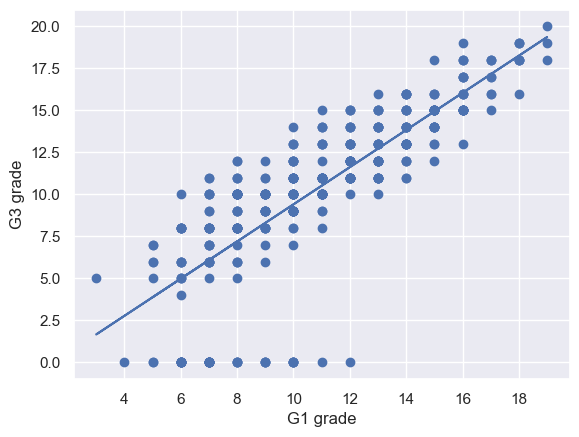

In [12]:
################################################################
# 単回帰分析                                                   #
# 予測した結果を図で描画                                       #
# アウトプットとインプットが線形の関係に成り立つことを理解する #
################################################################

# 先ほどの描画した散布図をプロット
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# 予測した線形回帰直線加える
plt.plot(X, reg.predict(X))
plt.grid(True)

上記を見ると予測式は実測値をうまく予測しているように見えるが、客観的に判断ができない。これを判断する**決定係数**を求めることが必要である。「1」に近ければよいモデルと判断できる。

In [13]:
# 決定係数、寄与率を求める
print('決定係数：', reg.score(X, Y))

決定係数： 0.64235084605227


#### 3-2-1-2 重回帰分析

In [16]:
#####################################################
# 解析データ準備                                    #
#####################################################

import requests, zipfile
from io import StringIO
import io

# データがあるurlの指定
# 今回、データサイエンス育成講座(書籍)をサンプルとして利用
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# データを取得
res = requests.get(url).content
auto = pd.read_csv(StringIO(res.decode('utf-8')), header=None)

# ヘッダを定義
auto.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors'
               ,'body-style','drive-wheels','engine-location','wheel-base','length','width','height'
               ,'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore'
               ,'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

# データ内容の確認
print('自動車データの形式：{}'.format(auto.shape))

# 先頭データ確認
auto.head()

自動車データの形式：(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


データを確認した結果、不適切な内容が設定されている可能性があるため、整理する必要がある。今回データ内に「?」が存在しているため、取り除くための前処理が必要である。

今回、horsepower,width,heightからpriceを予測することにするため、それぞれの「?」の状況を把握する。

In [17]:
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

「?」が格納されているデータは利用できないため、除外する必要がある。

In [18]:
auto = auto.replace('?', np.nan).dropna()
print('自動車データ形式：{}'.format(auto.shape))

自動車データ形式：(199, 4)


次に、データの型を確認する。

In [19]:
print('データ型の確認（型変換前）\n{}\n'.format(auto.dtypes))

データ型の確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object



データの加工がすべて完了したら、目的変数と説明変数の相関を確認する。重回帰の場合、**多重共線性**(multi-collinearity)が生じる可能性があるためである。

多重共線性とは、変数間の高い相関のために回帰係数の分散が大きくなり、係数の有意性が失われてしまう現象である。

In [20]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


データが揃ったため、モデルを構築する。

機械学習のモデル構築では、「モデル構築に使用する訓練データ」を使って学習させてモデルを構築する。このモデルに訓練データとは別の「テストデータ」を入れて、テストデータに対して、どの程度の精度で得られるのかを確認する。

In [21]:
################################################################
# 重回帰分析                                                   #
# 回帰係数・切片を求める                                       #
################################################################

# sklearnからインポート
# データ分割（訓練データとテストデータ）
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築
from sklearn.linear_model import LinearRegression

# 目的変数（y）：price、説明変数（X）：それ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータをわける
# test_size=0.5：データを半分ずつ利用する
# random_state=0：データを乱数を利用して抽出するが、0の場合、何回実行しても同じデータで検証可能
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 線形回帰モデルのインスタンス化
model = LinearRegression()

# モデルで訓練データを利用し学習
model.fit(X_train, y_train)

# 決定係数を確認する
print('決定係数（train）：{:.3f}'.format(model.score(X_train, y_train)))
print('決定係数（test）：{:.3f}'.format(model.score(X_test, y_test)))

# 回帰係数と切片を確認する
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片：{:.3f}'.format(model.intercept_))

決定係数（train）：0.733
決定係数（test）：0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片：-128409.046


機械学習の目的は高い汎化性能の獲得（構築したモデルによって、未知のデータでも適切に予測できること）であるため、訓練データへの当てはまりを追求すればよいモデルになると思いがちだが、実際そうではなく、訓練データに対する精度は良いがテストデータに対する精度が低くなることが起こりえる。このことを**過学習**(obverfitting)もしくは**過剰学習**と呼ぶ。

今回のケースは、訓練データとテストデータの決定係数が近いことがわかるため、過学習に陥っていないと判断できる。

### 3-2-2 ロジスティック回帰

ロジスティック回帰は、いくつかの説明変数から、ある事象の発生する確率を求める手法である。重回帰とは異なり目的変数は数値ではなくカテゴリを扱う（2分類だけではなく3分類以上も扱える）。

目的変数が数値の時と異なり、分類タスクでは**交差エントロピー誤差関数**(cross-entropy error function)が最小になるように学習する。正解カテゴリを予測できる確率が高くなるほど値が小さくなる。

ロジスティック回帰は以下の流れで実施する。

1. 対数オッズと呼ばれる値を、重回帰分析により予測する
1. 対数オッズをロジスティック関数（シグモイド関数）で変換することで、クラス$i$に属する確率$p_i$の予測値を求める
1. 各クラスに属する確率を計算し、最大確率を実現するクラスが、データが属するクラスと予測する

対数オッズとは以下で定義する。

$$
\log \bigg(\frac{p_i}{1 - p_i} \bigg)
$$

また、ロジット変換を行うことにより、出力が0から1の間の値に正規化され、確率として解釈が可能となる。

|分類値|関数|
|---|---|
|2値分類|シグモイド関数|
|多項分類|ソフトマックス関数|

上記とも、出力値が0～1に正規化する。

#### 3-2-2-1 ロジスティック回帰分析

In [22]:
#####################################################
# 解析データ準備                                    #
#####################################################

import requests, zipfile
from io import StringIO
import io

# データがあるurlの指定
# 今回、データサイエンス育成講座(書籍)をサンプルとして利用
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# データを取得
res = requests.get(url).content
adult = pd.read_csv(StringIO(res.decode('utf-8')), header=None)

# ヘッダを定義
adult.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
                 ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','flg-50K']

# データ内容の確認
print('データの形式：{}'.format(adult.shape))
print('欠損の数：{}'.format(adult.isnull().sum().sum()))

# 先頭データ確認
adult.head()

データの形式：(32561, 15)
欠損の数：0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


本データを確認すると、利用しにくいデータが存在する。

「flg-50K」列は、「<=50K」と「>50K」となっているが、扱いやすいように、「0」と「1」のフラグに変換する。

In [23]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [24]:
# 「fin_flg」カラムを追加する
# 「0」：「flg-50K」が「<=50K」の場合
# 「1」：「flg-50K」が「>50K」の場合
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x == ' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

今回、年齢や性別、職業などの個人に関するデータからその人の収入が50K(5万ドル)を超えるかどうかを予測するモデルを構築する。

In [25]:
################################################################
# ロジステック回析                                             #
################################################################

# sklearnからインポート
# データ分割（訓練データとテストデータ）
from sklearn.model_selection import train_test_split

# ロジスティック回帰のモデル構築
from sklearn.linear_model import LogisticRegression

# 目的変数（y）：fin_flg、説明変数（X）：age,fnlwgt,education-num,capital-gain,capital-loss
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータをわける
# test_size=0.5：データを半分ずつ利用する
# random_state=0：データを乱数を利用して抽出するが、0の場合、何回実行しても同じデータで検証可能
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰モデルのインスタンス化
model = LogisticRegression()

# モデルで訓練データを利用し学習
model.fit(X_train, y_train)

# 決定係数を確認する
print('正解率（train）：{:.3f}'.format(model.score(X_train, y_train)))
print('正解率（test）：{:.3f}'.format(model.score(X_test, y_test)))

正解率（train）：0.797
正解率（test）：0.798


上記の結果から、訓練データとテストデータともに約79%の正解率であり、過学習は起きていないと判断できる。

また、学習済みモデルの各変数(age,fnlwgt,education-num,capital-gain,capital-loss)の係数を確認しておく。

In [26]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

#### 3-2-2-2 ロジスティック回帰(スケーリング)

予測精度を上げるためのアプローチとして、スケーリングがある。

今回、age,fnlwgt,education-num,capital-gain,capital-lossの5つの説明変数を使っているが、それぞれの単位や大きさは異なっている。この場合、モデルの学習が値の大きな変数に引っ張られ値の小さな変数の影響が小さくなる懸念がある。

上記を発生させないため、説明変数の標準化する。

標準化とは、スケーリングの一種で、データの各値から変数列の平均を引き、標準偏差で割る。

In [27]:
################################################################
# ロジステック回析（スケーリング）                             #
################################################################

# sklearnからインポート
# データ分割（訓練データとテストデータ）
from sklearn.model_selection import train_test_split

# ロジスティック回帰のモデル構築
from sklearn.linear_model import LogisticRegression

# 標準化利用
from sklearn.preprocessing import StandardScaler

# 目的変数（y）：fin_flg、説明変数（X）：age,fnlwgt,education-num,capital-gain,capital-loss
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータをわける
# test_size=0.5：データを半分ずつ利用する
# random_state=0：データを乱数を利用して抽出するが、0の場合、何回実行しても同じデータで検証可能
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰モデルのインスタンス化
model = LogisticRegression()

# モデルで訓練データを利用し学習
model.fit(X_train_std, y_train)

# 決定係数を確認する
print('正解率（train）：{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率（test）：{:.3f}'.format(model.score(X_test_std, y_test)))

正解率（train）：0.811
正解率（test）：0.810


上記の結果、標準化しない場合に比べ正解率が上昇していることがわかる。ここで留意するポイントは**訓練データの平均値と標準偏差を使用している点である。テスト用データは将来手に入るであろう未知のデータという位置づけのため、標準化することはできない。**

### 3-2-3 サポートベクターマシン

サポートベクターマシンは、カテゴリを識別する境界線をマージンが最大となるように引く手法であり、少ない教師データで高い汎化性を持てるため、過学習が起こりにくい点が特徴である。マージンとは、学習データの内、最も決定境界線に近いものと、決定境界線との距離である。

![サポートベクター.jpg](./img/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC.png)

決定境界線を引いた際、必ずしもすべてのデータをきれいに分類することができない。

|マージン名|説明|特徴|
|---|---|---|
|ハードマージン|マージンの内側にデータが入ることを許容しない|ある程度分類できればOKとする|
|ソフトマージン|一部のデータがマージンの内側に入ることを許容する<br>(一部の誤分類を寛容にするためにスラック変数を利用する)|完璧に分類する必要あり|

また、サポートベクターマシンには以下がある。

1. 決定境界が線形の線形サポートベクターマシン
1. 決定境界が非線型のカーネル法のサポートベクターマシン

カーネル法で高速に計算するために、計算量を大幅に削減する方法をカーネルトリックと呼ぶ。また、誤分類を許容するための工夫として、スラック変数がある。

カーネル法によってデータの次元を増やし、低次元では識別できなかったようなデータも高次元になると高精度で分類できるため高い識別精度を維持することが可能のため識別精度が高いのが特徴である。

サポートベクターマシン(SVM)は、以下の活用事例がある。

|活用事例|説明|
|---|---|
|株価予測|日経平均や企業の株価の変動データを学習させ、前日よりも株価が上がるか下がるか予測|
|災害予測|土地の傾斜角度や地質、降水量、降雨時間などのデータを学習させ、大雨による土砂崩れが起きやすいパターンを検出<br>立地条件や築年数などのデータから、未知の不動産が一定価格より上がるか下がるかを予測|
|異常検知|製造工場での製品異常やクレジットカードの不正取引<br>正常データを1クラスとして学習させ、識別の境界を決定。その後、境界からのマージン（距離）を検出することで、正常ではない＝異常データを検出|
|手書文字認識|手書きされた各数字の画像をそれぞれの数字データとして分けられるため、アンケート結果の集計や郵便番号の認識|
|顔検出|画像のピクセルの値を判断し、その画像に顔が含まれているかどうかを識別<br>性別や個人の顔画像などのカテゴリを事前設定しておくことで、顔が含まれている場合にどのカテゴリの誰であるかといった判別利用<br>入退社管理や犯人特定といった用途にも応用|
|テキスト分類|テキストや文章を、あらかじめ登録されたカテゴリに分類する用途にも役立ちます。特定の単語やフレーズを学習させておき、そのデータに含まれているかどうかを分類することで、スパムメールの検出などの用途に有用|

サポートベクターマシン

(100, 2)
(100,)


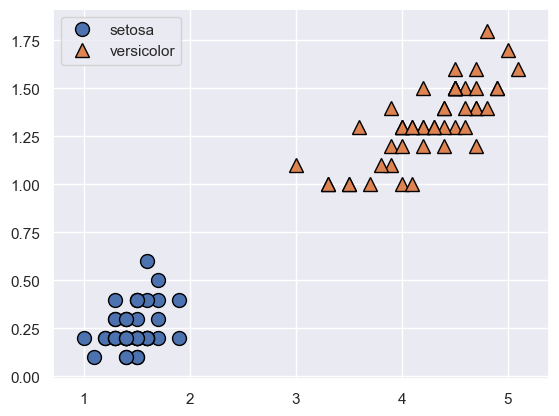

In [32]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
import mglearn

iris = load_iris()
X = iris.data[:100, 2:]
Y = iris.target[:100]
print(X.shape)
print(Y.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

c:\Users\明人\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


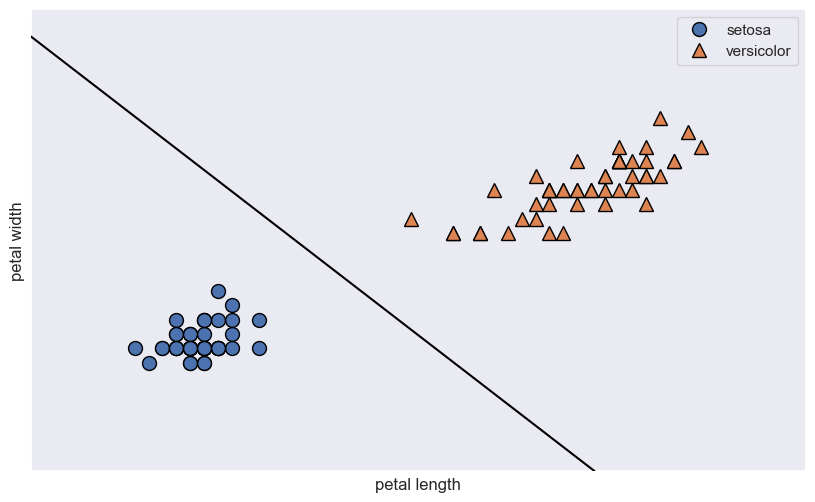

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC()
svm.fit(X_train, Y_train)

plt.figure(figsize=(10, 6))
mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

#### 3-2-3-1 サポートベクターマシン分析

In [28]:
#####################################################
# サポートベクターマシン                            #
# 乳がんに関するデータセット                        #
#####################################################

# SVMライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 訓練データとテストデータをわける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# サポートベクターマシンモデルのインスタンス化
model = LinearSVC()

# モデルで訓練データを利用し学習
model.fit(X_train, y_train)

# 決定係数を確認する
print('正解率（train）：{:.3f}'.format(model.score(X_train, y_train)))
print('正解率（test）：{:.3f}'.format(model.score(X_test, y_test)))

正解率（train）：0.866
正解率（test）：0.909


c:\Users\明人\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\明人\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 3-2-3-2 サポートベクターマシン分析(標準化)

サポートベクターマシンでは、標準化するとスコアが改善されることがある。

In [29]:
#####################################################
# サポートベクターマシン(標準化)                    #
# 乳がんに関するデータセット                        #
#####################################################

# SVMライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# 標準化利用
from sklearn.preprocessing import StandardScaler

# データの読み込み
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 訓練データとテストデータをわける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# サポートベクターマシンモデルのインスタンス化
model = LinearSVC()

# モデルで訓練データを利用し学習
model.fit(X_train_std, y_train)

# 決定係数を確認する
print('正解率（train）：{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率（test）：{:.3f}'.format(model.score(X_test_std, y_test)))

正解率（train）：0.993
正解率（test）：0.951


c:\Users\明人\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### 3-2-4 決定木

決定木(Decision Tree)は、条件分岐によって分割していくことで分類問題などを解く手法である。条件分岐は、**情報利得の最大化**という考え方を用いて求められる。

情報利得の最大化とは、データ分割の前後で比較して、最もデータを綺麗に分割できる条件を求めるための方法である。

決定木は以下には以下がある。

|名称|利用用途|
|---|---|
|分類木|ある事象の分類が目的|
|回帰木|数値の予測が目的|

![分類木](./img/分類木.png)
![回帰木](./img/回帰木.png)

#### 3-2-4-1 データ準備

##### 3-2-4-1-1 データ

In [2]:
######################################
# キノコデータの準備                 #
######################################

import requests
import io

# データ取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# データ読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# 列名の設定
# http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names
mushroom.columns = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'bruises',
                    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
                    'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                    'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
                    'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

# データ確認
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# データ構造の確認
print('データ形式：{}'.format(mushroom.shape))
print('欠損の数：{}'.format(mushroom.isnull().sum().sum()))

データ形式：(8124, 23)
欠損の数：0


上記の結果より、データは以下となる。


*   データ構造：8124行、23列
*   欠損値はない

次はデータの整理を実施する。

カテゴリ変数をダミー変数化する。

In [24]:
# 必要な列を抽出
mushroom_dummy = pd.get_dummies(mushroom[['gill_color', 'gill_attachment', 'odor', 'cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


目的変数もカテゴリに変更した状態でダミー変数に変更する必要がある。

In [5]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x:1 if x == 'p' else 0)

モデル構築前に不純度(impurity)の視点で確認する。

不純度とは、毒キノコか否かの識別の状態を表す指標で、不純度が高いとはカテゴリ識別ができていない状態を意味する。

例えば、cap_colorがcまたはgill_colorがbである場合、毒キノコがどれくらいあるかをクロス集計する。

In [6]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [7]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


上記のように、２変数で確認したが、他の変数もありそれぞれに対して条件分岐を考える必要がある。このような条件分岐を利用し、最も有益な条件分岐を得られるかを見分けるアルゴリズムが決定木である。

その分岐条件の優劣を決める際に不純度が使われる。その不純度の指標としてよく使われるものに**エントロピー**(entropy)がある。

キノコデータでエントロピーの計算を実施する。扱っているデータセットは合計で8124行あったので、それぞれの確率を計算する。

In [8]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [9]:
entropy_init = - (4208/8124 * np.log2(4208/8124) + 3916/8124 * np.log2(3916/8124))
print('毒キノコデータのエントロピーの初期値：{:.3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値：0.999


##### 3-2-4-1-2 エントロピー解説

エントロピーの定義は以下の式$H(S)$で与えられる。$S$はデータの集合、$n$はカテゴリ数、$p$は各カテゴリに属するデータサンプルの割合である。

$$
H(S) = - \sum_{i=1}^{n} (p_i \log_2 p_i)
$$

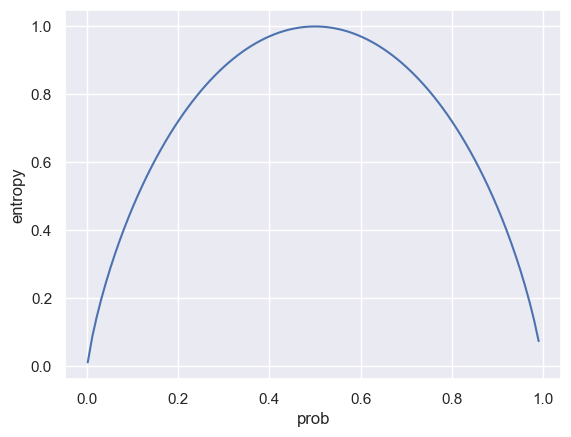

In [10]:
# エントロピー関数
def calc_entropy(p):
  return - (p * np.log2(p) + (1-p) * np.log2(1-p))

# p の値を0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001, 0.999, 0.01)

# グラフ化
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

#### 3-2-4-2 分類木

In [16]:
#######################################
# 決定木のモデル構築（分類木）        #
# キノコデータを用いる                #
#######################################

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf = model.fit(X_train, y_train)

print('正解率(train)：{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test)：{:.3f}'.format(model.score(X_test, y_test)))

正解率(train)：0.883
正解率(test)：0.894


決定木の分岐数決定のパラメータにmax_depthに今回は５を設定している。深ければ深いほど正解率を高めることができるが、過学習の危険性が増すため、注意が必要となる。

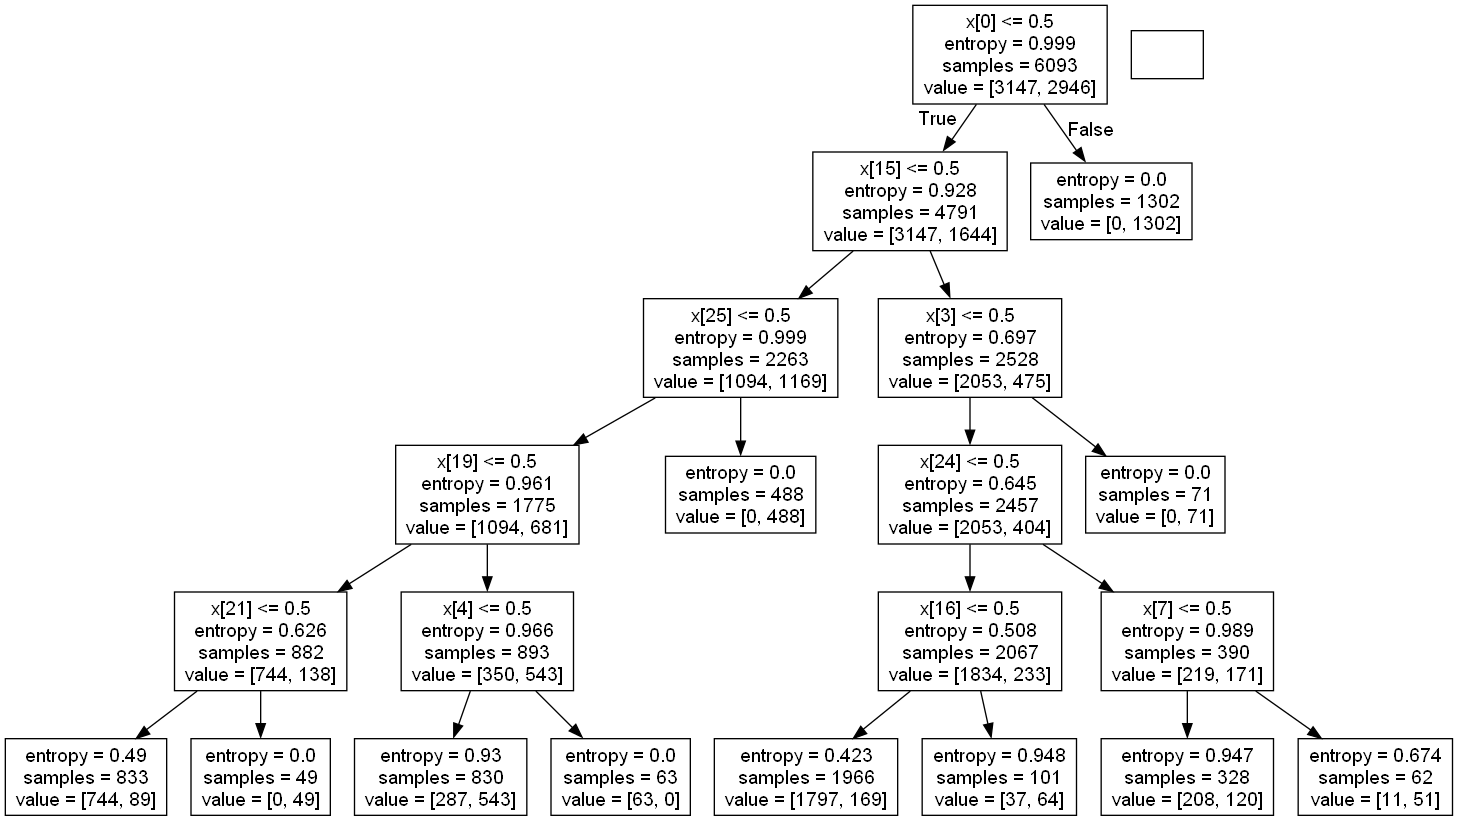

In [17]:
############################################
# 決定木の結果の可視化                      #
# Graphvizを利用（別途インストール必要あり） #
############################################

from sklearn import tree
import pydotplus

from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

[Text(0.625, 0.9166666666666666, 'x[0] <= 0.5\nentropy = 0.999\nsamples = 6093\nvalue = [3147, 2946]'),
 Text(0.5625, 0.75, 'x[15] <= 0.5\nentropy = 0.928\nsamples = 4791\nvalue = [3147, 1644]'),
 Text(0.3125, 0.5833333333333334, 'x[25] <= 0.5\nentropy = 0.999\nsamples = 2263\nvalue = [1094, 1169]'),
 Text(0.25, 0.4166666666666667, 'x[19] <= 0.5\nentropy = 0.961\nsamples = 1775\nvalue = [1094, 681]'),
 Text(0.125, 0.25, 'x[21] <= 0.5\nentropy = 0.626\nsamples = 882\nvalue = [744, 138]'),
 Text(0.0625, 0.08333333333333333, 'entropy = 0.49\nsamples = 833\nvalue = [744, 89]'),
 Text(0.1875, 0.08333333333333333, 'entropy = 0.0\nsamples = 49\nvalue = [0, 49]'),
 Text(0.375, 0.25, 'x[4] <= 0.5\nentropy = 0.966\nsamples = 893\nvalue = [350, 543]'),
 Text(0.3125, 0.08333333333333333, 'entropy = 0.93\nsamples = 830\nvalue = [287, 543]'),
 Text(0.4375, 0.08333333333333333, 'entropy = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(0.375, 0.4166666666666667, 'entropy = 0.0\nsamples = 488\nvalue = [0,

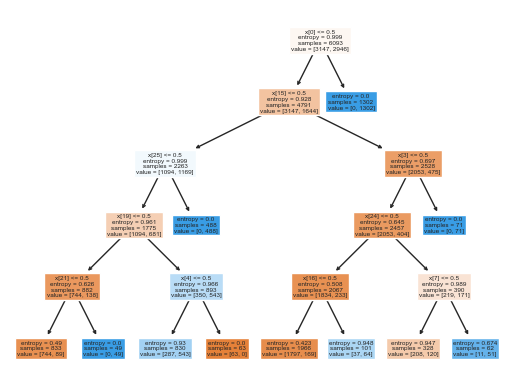

In [23]:
####################################
# 別の出力方法                      #
# sklearn.treeのplot_treeを利用     #
####################################

from sklearn.tree import plot_tree

plot_tree(clf, filled=True)

#### 3-2-4-3 回帰木

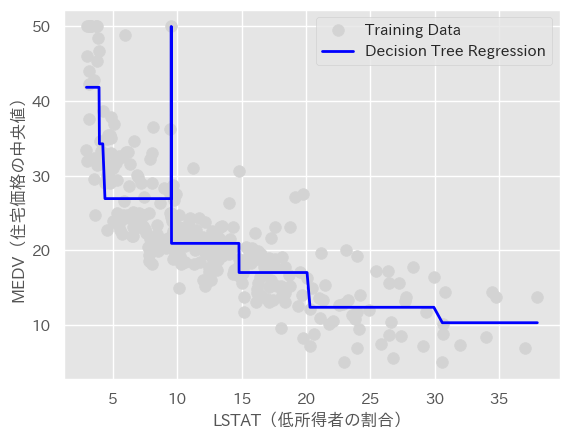

In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# データ
data_url = "http://lib.stat.cmu.edu/datasets/boston"
"""
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
"""
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO"])
df = pd.DataFrame(data=np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]]), columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

""" モデル学習 """
# 変数定義
X = df[['LSTAT']].values  # 説明変数
y = df['MEDV'].values     # 目的変数（住宅価格の中央値）

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 決定木回帰
model_tree = DecisionTreeRegressor(criterion='friedman_mse', 
                                   splitter='best', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0,
                                   max_features=None, 
                                   random_state=None, 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, 
                                   ccp_alpha=0.0
                                  )
model_tree.fit(X_train, y_train)

# 推論
y_train_pred = model_tree.predict(X_train)
y_test_pred  = model_tree.predict(X_test)


""" グラフ可視化 """
# flatten：1次元の配列を返す、argsort：ソート後のインデックスを返す
sort_idx = X_train.flatten().argsort()

# 可視化用に加工
X_train_plot  = X_train[sort_idx]
Y_train_plot  = y_train[sort_idx]
train_predict = model_tree.predict(X_train_plot)

# 可視化
plt.scatter(X_train_plot, Y_train_plot, color='lightgray', s=70, label='Training Data')
plt.plot(X_train_plot, train_predict, color='blue', lw=2, label="Decision Tree Regression")    

# グラフの書式設定
plt.xlabel('LSTAT（低所得者の割合）')
plt.ylabel('MEDV（住宅価格の中央値）')
plt.legend(loc='upper right')
plt.show()

In [132]:
from sklearn.metrics import r2_score            # 決定係数
from sklearn.metrics import mean_squared_error  # RMSE

# 予測値(Train）
y_train_pred = model_tree.predict(X_train)

# 予測値（Test)
y_test_pred = model_tree.predict(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習: %.2f, テスト: %.2f' % (
        mean_squared_error(y_train, y_train_pred, squared=False), # 学習
        mean_squared_error(y_test, y_test_pred, squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習: %.2f, テスト: %.2f' % (
        r2_score(y_train, y_train_pred), # 学習
        r2_score(y_test, y_test_pred)    # テスト
      ))

RMSE 学習: 4.54, テスト: 6.36
R^2 学習: 0.74, テスト: 0.55


上記決定係数$R^2$に着目すると、学習データを使った$R^2$は0.74と関係が捕捉できているにも関わらず、テストデータを使った$R^2$は0.55と低くなっている。

上記の結果から分かることから、回帰木のモデルが過学習の状態にあると言える。そのため、重回帰で検証してみる。

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

""" モデル学習 """
# 変数定義
X = df.iloc[:, :-1].values # 説明変数（目的変数以外）
y = df['MEDV'].values      # 目的変数（住宅価格の中央値）

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 決定木回帰
model_tree = DecisionTreeRegressor(criterion='friedman_mse', 
                                   splitter='best', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0,
                                   max_features=None, 
                                   random_state=None, 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, 
                                   ccp_alpha=0.0
                                  )
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [136]:
from sklearn.metrics import r2_score            # 決定係数
from sklearn.metrics import mean_squared_error  # RMSE

# 予測値(Train）
y_train_pred = model_tree.predict(X_train)

# 予測値（Test)
y_test_pred = model_tree.predict(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習: %.2f, テスト: %.2f' % (
        mean_squared_error(y_train, y_train_pred, squared=False), # 学習
        mean_squared_error(y_test, y_test_pred, squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習: %.2f, テスト: %.2f' % (
        r2_score(y_train, y_train_pred), # 学習
        r2_score(y_test, y_test_pred)    # テスト
      ))

RMSE 学習: 3.84, テスト: 4.73
R^2 学習: 0.82, テスト: 0.75


### 3-2-5 アンサンブル学習

アンサンブル学習は、性能の低い学習器を組み合わせて、性能の高い学習器を作る方法である。個別のアルゴリズムのチューニングでは突破できない性能を、アンサンブル学習では実現できる可能性がある。

その種類は以下がある。


*   バギング
*   ブースティング



#### 3-2-5-1 バギング

バギング(bootstrap appregating:bagging)は、弱学習器を並列に学習させ組み合わせる方法である。

バギングの流れは、元の学習データ(n行)からランダムにn行のデータを復元抽出(重複を許して抽出)し、新しい学習データを作成するということを繰り返す(これを部とストラップという)。そして、その取り出したデータそれぞれに対して、１つ１つモデルを作成し、モデルの結果を集約して予測する。

結果の集約は分類であれば多数決、回帰であれば平均値をとるなどする。

代表的な手法として、**ランダムフォレスト**がある。弱学習器として決定木を使い、複数の決定木を使うことで精度向上を図っている。

##### 3-2-5-1-1 バギングの例

In [25]:
##############################################
# k-NNモデルを利用したバギングモデル構築     #
# データは乳がんデータを利用                 #
##############################################

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データ読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# k-NNモデルとそのバギングの設定
# k-NNモデルを１００個バギングする
models = {
    'kNN':KNeighborsClassifier(),
    'bagging':BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train, y_train)
  scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果表示
pd.Series(scores).unstack()

,test_score,train_score
bagging,0.937063,0.950704
kNN,0.923077,0.948357


上記の結果より、訓練データはほぼ同じだが、テストデータではスコアが向上していることがわかる。

また、BaggingClassifierクラスで、以下のパラメータを持ち、元のモデルが過学習しているときは手元のデータをそのまますべて使わず、多様性を与えることで有効な過学習対策になる可能性がある。

|パラメータ|説明|
|---|---|
|max_samples|ブーストラップをするときに基のデータの何割抽出するかを指定(デフォルトは1.0)|
|max_features|説明変数をどの程度サンプリングするかを指定(デフォルトは1.0)|

#### 3-2-5-2 ブースティング

ブースティングは、弱学習器を順番に学習させて組み合わせて強くしていく手法である。

ブースティングの流れは、オリジナルの学習データに対し最初のモデルが構築される。この時点で予測と成果を比較して合致しているサンプル、外しているサンプルを把握する。その外しているサンプルが次のモデル構築の段階で重視される新しい学習データが生成される。このようなステップが繰り返される過程でモデルも逐次的に複数構築される。最後に、それらの予測値を組み合わせることで汎化性能の向上が図られる。

代表的な手法として、**勾配ブースティング**がある(XGBoostが有名)。ブースティングでは、損失関数として、勾配降下法を使用する。

##### 3-2-5-2-1 ブースティングの例

In [28]:
###############################################
# 決定木モデルをブースティングする             #
# ボストンデータを利用(sklearn=1.2以降は削除)  #
# 乳がんデータに変更                           #
###############################################

#from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

# データ読み込み
#boston = load_boston()
cancer = load_breast_cancer()

# 訓練データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=66
)

# パラメータ設定
models = {
    'tree':DecisionTreeRegressor(random_state=0),
    'AdaBoost':AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train, y_train)
  scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果表示
pd.Series(scores).unstack()

,test_score,train_score
AdaBoost,0.878090,1.0
tree,0.756181,1.0


#### 3-2-5-3 ランダムフォレストと勾配ブースティング

バギングとブースティングの代表例として、ランダムフォレスト(Random Forest)と勾配ブースティング(Gradient Boosting)の例を示す。

In [29]:
###########################################
# ランダムフォレストと勾配ブースティング  #
# Husingデータを利用する                  #
###########################################

#from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# データ読み込み
#boston = load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 訓練データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=66
)

# パラメータ設定
models = {
    'RandomForest':RandomForestRegressor(random_state=0),
    'GradientBoost':GradientBoostingRegressor(random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train, y_train)
  scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果表示
pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.926076,0.977138
RandomForest,0.894637,0.979374


上記の結果から、勾配ブースティングの性能が高そうであることがわかる。

アンサンブル学習では、モデルの解釈性の低さがあるが、モデル構築の中でどの変数が重要な役割を担ったかを定量的に把握することが可能である。

<Axes: >

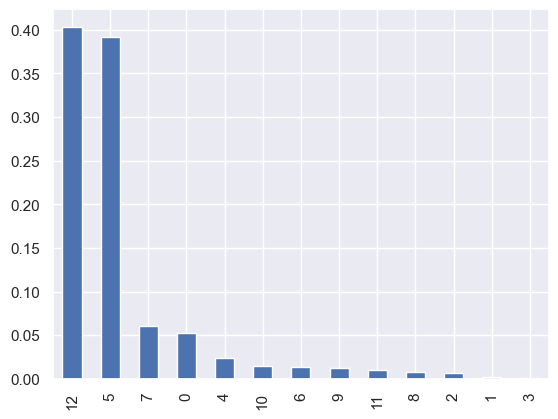

In [30]:
##########################################
# 変数の重要度の取得                     #
##########################################

# 重要度(feature_importances)を取得
s = pd.Series(models['RandomForest'].feature_importances_)

# 取得した値を降順で表示
s.sort_values(ascending=False).plot.bar(color='C0')

### 3-2-6 ニューラルネットワーク

ニューラルネットワークは、動物の神経システムを模倣した学習モデルの総称である。回帰問題、分類問題に適用可能であり、特に分類問題に使われる。

![ニューラルネットワーク.png](./img/ニューラルネットワーク.png)

詳しくは深層学習で説明する。

### 3-2-7 ベイジアン学習

ベイジアン学習は、条件付き確率を使用した機械学習アルゴリズムで、ベイズの定理を利用して結果から原因を推論することが可能。活用事例として、スパムメールフィルタやECサイトのレコメンデーションがある。

#### 3-2-7-1 ベイズの定理

ある条件Aのもとで、事象Bが起こる確率(条件付き確率または事後確率)を$P(B|A)$と表すと、事象Bが起こった時に条件Aである事前確率$P(A|B)$は以下で表す。

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

#### 3-2-7-2 尤度

あるデータが与えられたとき、どのような確率分布が最もよくデータの分布を表すかをベイズの定理を用いて推定する。その時、確率分布の尤(もっと)もらしさ表す指標を**尤度**(ゆうど)という。

尤度は尤度関数を用いて計算する。尤度関数の特徴は以下である。

*   条件付き確率と紐づいた関数
*   負の値はとらない
*   積分すると1となる
*   確率密度関数とは別の概念


尤度関数を最大化するパラメータを推定する手法を**最尤法**(Method of maximum likelihood)という。１９２２年にロナルド・フィッシャーが論文で初めて使用した用語である。


#### 3-2-7-4 ベイジアンネットワーク

ベイジアンネットワークは、原因と結果の複数の組み合わせを有向グラフで可視化した確率モデルの１つである。各ノードがマルコフ性を満たす、つまり、各ノードの状態が条件付き独立であることで計算を大幅に簡略化できる。

### 3-2-8 時系列分析

時系列分析は時間軸に沿ってデータを分析する技術である。過去のデータから将来のデータを予測する場合、回帰分析が用いられることが多い。しかし、時間に対する依存性のあるデータや、周期性があるような時系列データでは、回帰分析では高い精度がでないケースが多くなる。この場合に有効な方法である。

#### 3-2-8-1 自己相関

ある時点の変数が、過去の自身の変数と相関関係にある場合、自己相関関係にあると呼び、その相関係数を**自己相関係数**と呼ぶ。時間差$h$の自己相関がある場合、ラグ$h$の**自己相関**と呼ぶ。

相関係数$r$は以下の性質を持つ。

*   $-1 \le r \le 1$
*   $r > 0$ならばデータは正の相関をもつ
*   $r < 0$ならばデータは負の相関をもつ
*   $r \risingdotseq 1$または$r \risingdotseq -1$ほど相関が強い<br>データが一直線上に分布している


#### 3-2-8-2 定常性

時系列$\{y_1,y_2,...,y_t,...y_n\}$を考えたとき、ある時点でのデータ$y_t$は、その時点での確率分布を持つ確率変数$Y_t$に属していると考えることができる。この確率変数列$\{ Y_1,Y_2,...,Y_n \}$が以下の3つの条件を満たすとき、**定常性**を持つという。

1. 平均が一定：$E(Y_t) = \mu$
1. 分散が一定：$Var(Y_t) = y_0$
1. 自己共分散がラグ$h$のみに依存：$Cov(Y_t, Y_{t-1}) = y_h$

定常性を持つとき、ラグ$h$の自己相関係数を$\phi_h$とすると、$\phi_0=1, |\phi_h| < 1$となる。

#### 3-2-8-3 各種モデル

|モデル名|説明|
|---|---|
|MA(Moving Average：移動平均)モデル|1次のMAモデルは、現在のホワイトノイズとラグ1のホワイトノイズに重みづけしたもので構成される|
|AR(Autoregressive：自己回帰)モデル|過去の自身の値を入力の変数とするモデル<br>ラグを次数と呼ぶ|
|ARMA(Autoregressive and Moving Average：自己回帰移動平均)モデル|MAとARモデルを組み合わせたモデル|
|ARIMAモデル<br>(Autoregressive Integrated and Moving Average：自己回帰和分移動平均)|時系列の階差に対してARMAモデルを適用したもの|

#### 3-2-8-4 単位根過程

時系列データは、定常性を有することが分析の前提となる。そこで、時系列データの定常性を確認することが重要である。定常性を有するには、平均と分散が、時間で発散しないことが必要である。しかし、特定条件(自己回帰モデルにおいて、自己相関係数$\phi=1$)では、非定常な時系列にもかかわらず、データのふるまいを見ただけでは分析対象外かどうか判断しにくくなることを、**単位根過程**という。

### 3-2-9 クラスタリング

教師あり学習におけるクラスタリングにはk近傍法がある。教師なし学習のk-Means法とは別物であることに注意する。

k近傍法とは、あらかじめクラス分けされた教師データをもとに、新しいデータのクラスを最も近いk個データのクラスから多数決で分類する手法である。

#### 3-2-8-1 k近傍法(分類)

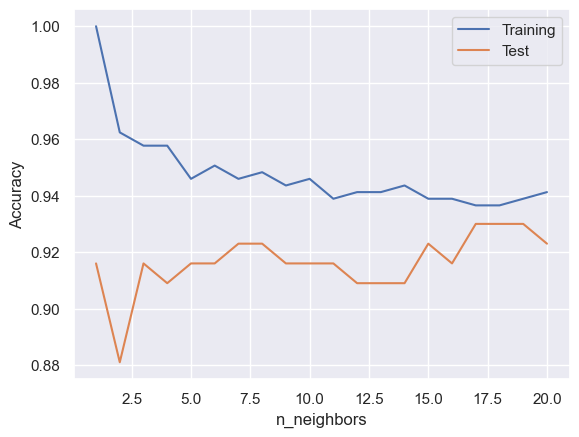

In [31]:
#####################################################
# k近傍法(分類)                                     #
#####################################################

# KNNライブラリ
from sklearn.neighbors import KNeighborsClassifier

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 訓練データとテストデータをわける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# グラフ表示データリスト
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1, 21):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  training_accuracy.append(model.score(X_train, y_train))
  test_accuracy.append(model.score(X_test, y_test))

# グラフ表示
plt.plot(range(1, 21), training_accuracy, label='Training')
plt.plot(range(1, 21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

上記の結果、kを1～20で正解率の変化を分析しているが、kが小さいときは正解率に剥離がある。また、6～8くらいからはあまり精度が改善されないため、kを増やしても効果がないわかる。

#### 3-2-8-2 K近傍法(回帰)

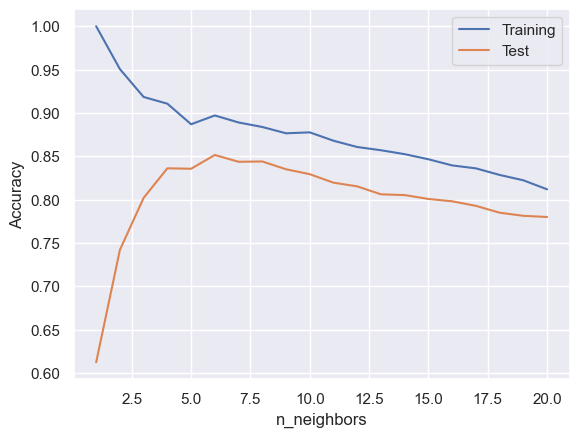

In [33]:
#####################################################
# k近傍法(回帰)                                     #
# 学生のテスト結果データを用いて、最適なkを求める   #
# 目的変数：G3                                      #
# 説明変数：'age','Medu','Fedu','traveltime'        #
#           ,'studytime','failures','famrel',       #
#            'freetime','goout','Dalc','Walc'       #
#           ,'absences','G1','G2'                   #
#####################################################

# KNNライブラリ
from sklearn.neighbors import KNeighborsRegressor

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
student = pd.read_csv('data/student-mat.csv', sep=';')
X = student.loc[:, ['age','Medu','Fedu','traveltime','studytime'
                ,'failures','famrel','freetime','goout','Dalc','Walc'
                ,'absences','G1','G2']].values
y = student.loc[:, ['G3']].values

# 訓練データとテストデータをわける
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# グラフ表示データリスト
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1, 21):
  model = KNeighborsRegressor(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  training_accuracy.append(model.score(X_train, y_train))
  test_accuracy.append(model.score(X_test, y_test))

# グラフ表示
plt.plot(range(1, 21), training_accuracy, label='Training')
plt.plot(range(1, 21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## 3-3 教師なし学習

教師なし学習とは、教師あり学習とは異なり、正解データを与えない。そのため、入力データの中の部分集合を見つけるなど、入力データの構造を理解するための手法である。

|種類|説明|例|代表的な手法|
|---|---|---|---|
|次元削減|より少ない次元でデータを理解|身長と体重のデータを基に、<br>体格を認識する|主成分分析<br>t-SNE法|
|クラスタリング|対象のデータをいくつかの<br>クラスタ(似ているデータの集まり)に<br>分類する|売上データとそれに紐づく顧客データから、<br>どのような顧客クラスタがあるか認識する|k-Means法|

### 3-3-1 次元圧縮

次元圧縮は、データの次元を圧縮することによって、データの構造を見やすくしたり、機械学習の計算量を軽減して計算スピードを向上させたりする手法である。

#### 3-3-1-1 主成分分析

主成分分析(Primary Component Analysis:PCA)は、相関のある複数の変数を、ばらつきの方向と大きさに着目し、より相関の少ない合成関数に変換して、データの次元を縮約する手法である。

元のデータの持つ情報をできるだけ失わずに変数の数を圧縮することができるため、探索的分析の前処理や予測モデル構築時の前処理として広く使われている。

主成分分析がどのようなものかをPythonを利用して確認する。

相関係数0.889:


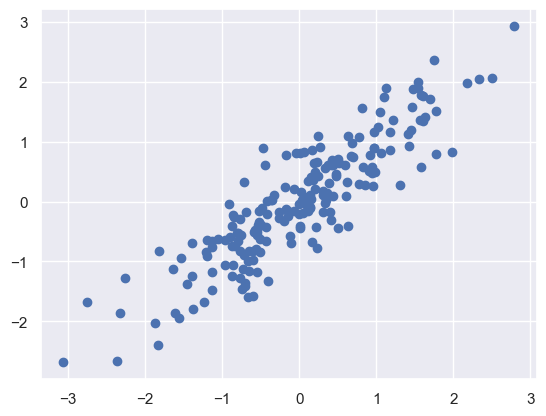

In [34]:
########################################
# 主成分分析(サンプルデータ生成)       #
########################################

from sklearn.preprocessing import StandardScaler

# ランダム情報でサンプリング
sample = np.random.RandomState(1)
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数算出、グラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

[[-0.707 -0.707]
 [-0.707  0.707]]
各主成分の分散:[1.899 0.111]
各主成分の分散割合:[0.945 0.055]


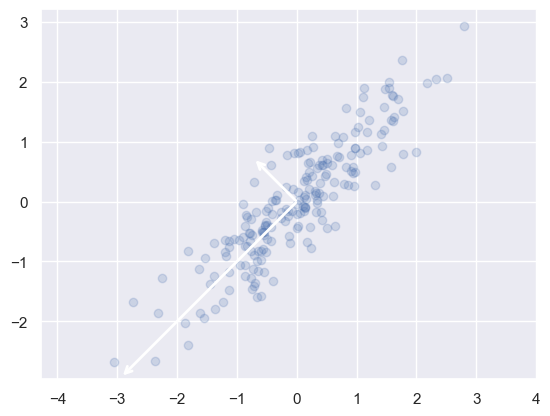

In [35]:
from matplotlib.patches import ArrowStyle
############################################
# 主成分分析(結果確認)                     #
############################################

from sklearn.decomposition import PCA

# 主成分分析(サンプルデータが2次元であるため、引数で2を指定)
pca = PCA(n_components=2)
pca.fit(X_std)

# 結果確認(新しい特徴空間の軸の向きを確認する)
print(pca.components_)

# 結果確認(2つの主成分の分散)
# 本総和ともともとの分散の総和は等しい
print('各主成分の分散:{}'.format(pca.explained_variance_))

# 結果の確認(各主成分が持つ分散の比率)
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

# 上記数値だけではわかりにくいため、
# 図を表示する
# パラメータ設定
arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=1, shrinkB=1)

# 矢印を描くための関数定義
def draw_vector(v0, v1):
  plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

図を見ると、元の散布図に対して分散が最大になる方向のベクトルが第一成分で、次に分散が大きい方向のベクトルが第二成分である。第一と第二成分は直交する。このとき、主成分の寄与度を表すものを**主成分得点**(主成分スコア)、観測変数と相関を表すものを**主成分負荷量**もしくは**因子負荷量**といい、主成分分析の結果評価に用いる。

次に具体的なデータを利用した結果を確認する。

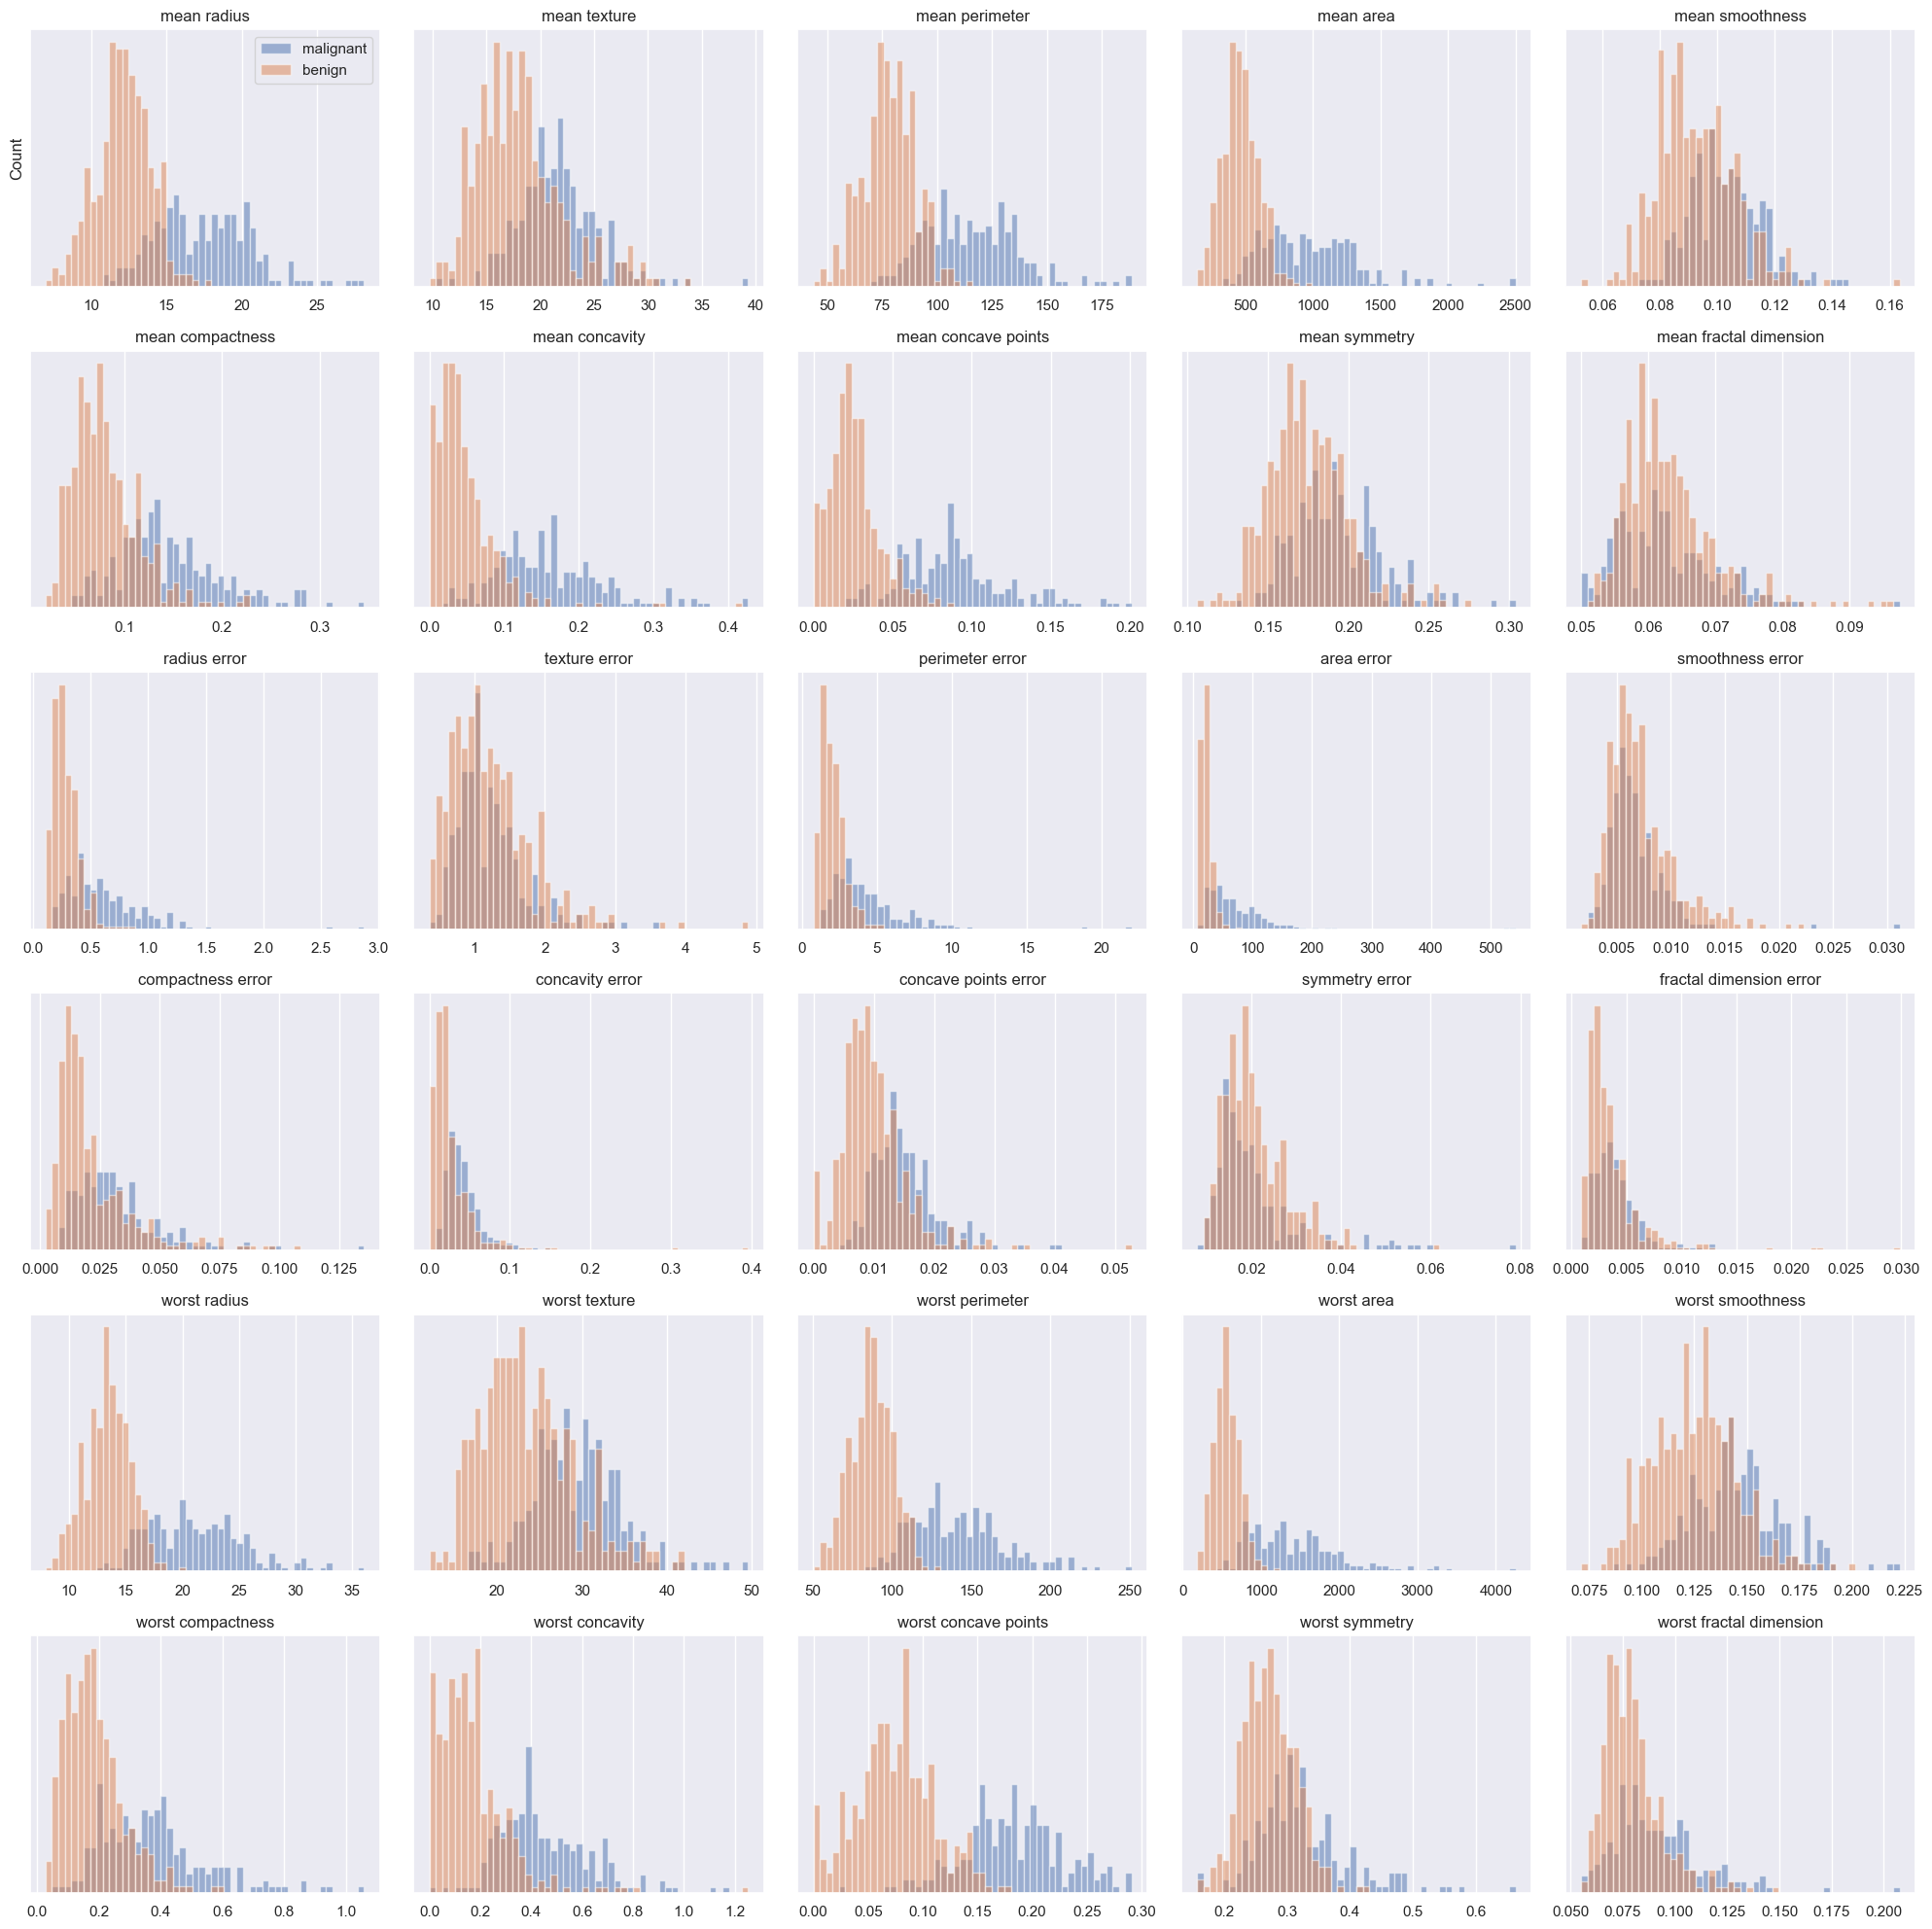

In [36]:
##################################
# 主成分分析（乳がんデータ）     #
##################################

# 乳がんデータ
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# データをmalignant（悪性）、benign（良性）で分ける
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

# 各説明変数ごとの悪性/良性のヒストグラム
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins, alpha=0.5)
  ax[i].hist(benign[:, i], bins, alpha=0.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

上記のデータに対して、主成分分析により20以上ある変数の次元を削除する。

In [37]:
##################################
# 主成分分析（乳がんデータ）     #
# 前述したコードのつづき         #
##################################

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析（次元は2）
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 結果確認
print('X_pca shape:{}'.format(X_pca.shape))
print('Explaind variance ratio:{}'.format(pca.explained_variance_ratio_))


X_pca shape:(569, 2)
Explaind variance ratio:[0.443 0.19 ]


上記の結果より、主成分分析をした後のデータが、569行2列（2変数)となったことを示す。元の情報の63%（0.443+0.19）が第1主成分と第2主成分に凝縮されていることがわかる。

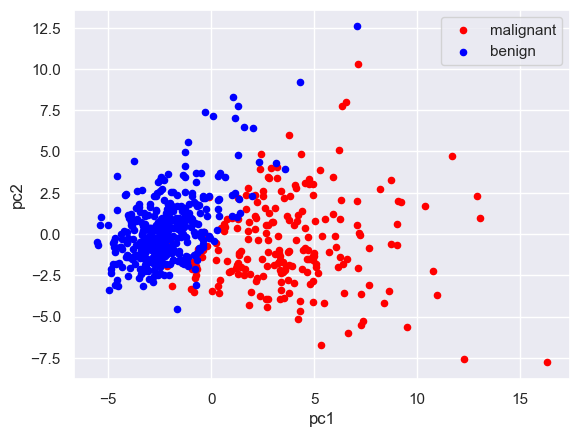

In [38]:
################################
# 主成分分析した結果の可視化   #
################################

# ラベル名を定義
# 1つ目が第1主成分、2つ目が第2主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

# 目的変数を上記のデータに列追加
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性、良性にわける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

# それぞれを合わせて表示
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);


#### 3-3-1-2 t-SNE法

t-SNE法は、高次元のデータを、自由度1のt分布を用いて2次元や3次元の低次元に圧縮する方法である。

|頭文字|意味|
|---|---|
|t|t分布|
|S|確率的(Stochastic)|
|N|隣接(Neighbor)|
|E|埋め込み(Embedding)|


この手法で次元圧縮すると、離れたグループはより離れて配置されるため、クラスタリングしやすくなるという特徴がある。

|メリット|デメリット|
|---|---|
|高次元の局所的な構造を非常によく捉える<br>大局的な構造も可能な限り捉える|Perplexity(内部のパラメータ)を<br>変えると全くことなるクラスターが出現してしまう|

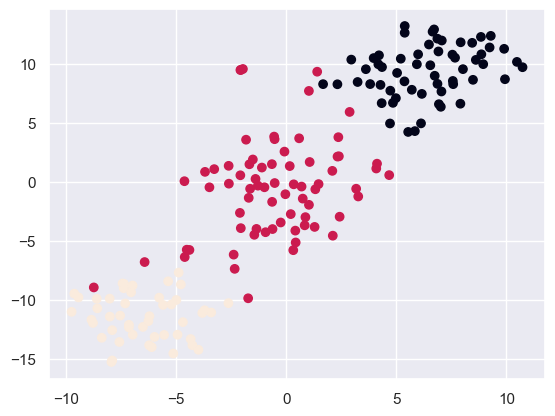

In [39]:
#####################################
# t-SNE法                           #
# ワインデータを利用する            #
#####################################

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# データ読み込み、データ変換
wine = load_wine() 
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 標準化、データ変換
df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df,columns=wine.feature_names)

# モデル構築
tsne = TSNE(random_state=0)

# 学習
tsne_results = tsne.fit_transform(df)

# 結果表示
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=wine.target)
plt.show()

### 3-3-2 クラスタリング

クラスタリングの目的は、与えられたデータを類似性の高いグループに分けることである。クラスタリングで最も広く使われている手法として、k-Means法がある。

#### 3-3-2-1 K-Means法

データをk個のクラスタに分け、各クラスタの重心に一番近い点をそのクラスタに分類しなおすということを繰り返して、データをクラスタリング手法である。

|方法|説明|
|---|---|
|エルボー法|最適なkを見積もる方法としてSSE(残差平方和)の減少量を確認する|
|シルエット法|クラスタ内のデータの凝集度を確認する|

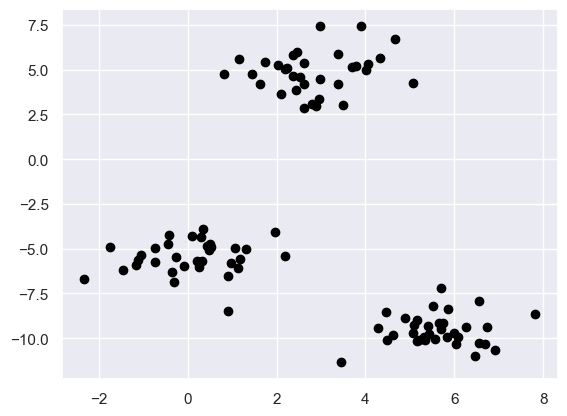

In [40]:
#####################################
# k-Means法（訓練データ作成）       #
# datasets内のmake_blobsの利用      #
#####################################

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# データ生成
# 2値を返却するが、一方は利用しないため、「_」で受け取る
X, _ = make_blobs(random_state=10)

# データの可視化
plt.scatter(X[:, 0], X[:, 1], color='black')

c:\Users\明人\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


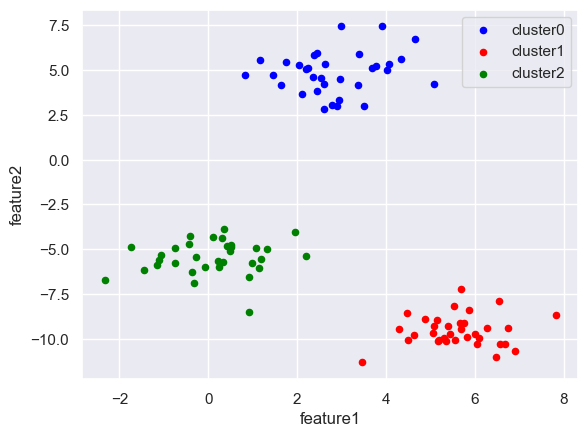

In [41]:
#####################################
# k-Means法（予測/結果確認）        #
# datasets内のmake_blobsの利用      #
#####################################

# k-Means初期化
kmeans = KMeans(init='random', n_clusters=3)

# クラスタの計算
kmeans.fit(X)

# クラスタ番号の予測
y_pred = kmeans.predict(X)

# 予測した結果とデータを1つのデータに結合する
merge_data = pd.concat([pd.DataFrame(X[:, 0]), pd.DataFrame(X[:, 1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

# データの可視化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)


##### 3-2-2-1-1 実際の例

金融データを受け取り、「どのような顧客がいるかわからないから分析してほしい」という分析要求を提示されたとして仮定する。

In [43]:
###########################################################################
# データ準備                                                              #
# http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip #
###########################################################################

import requests, zipfile
import io

# データ取得
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# 展開し、ファイルを読み込む
req = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(req.content))
z.extractall(path='data/')
bank = pd.read_csv('data/bank-full.csv', sep=';')

# データ確認
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
# 欠損値確認
print('データ形式(X,y):{}'.format(bank.shape))
print('欠損データの数：{}'.format(bank.isnull().sum().sum()))

データ形式(X,y):(45211, 17)
欠損データの数：0


In [45]:
###############################################
# データの整理と標準化                        #
# 分析対象変数：age,balance,campaign,previous #
###############################################

from sklearn.preprocessing import StandardScaler

# データの整理
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


c:\Users\明人\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster_number
4    14454
0    23791
3     1286
2     3781
5      525
1     1374
Name: count, dtype: int64


Text(0, 0.5, 'count')

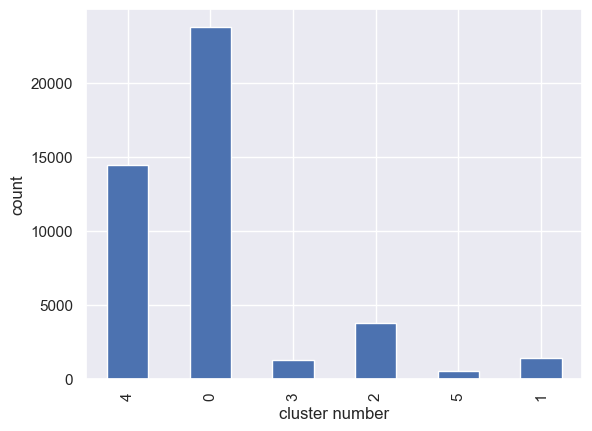

In [46]:
##########################################
# クラスタリング処理                     #
# クラスタ別の集計結果を棒グラフで表示   #
##########################################

from sklearn.cluster import KMeans

# 初期化および計算
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)

# 分析用に変換
labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))

# 描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

##### 3-2-2-1-2 エルボー法

上記までの例ではクラスタ数を決め打ちしていたが、事前に見積もる方法がある。

##### 3-2-2-1-3 シルエット法

##### 3-2-2-1-4 結果の解釈

## 3-4 半教師あり学習

半教師あり学習とは、教師あり学習と教師なし学習の2つの手法を組み合わせたものである。つまり、少量のラベルありデータを用いることで大量のラベルなしデータをより学習に活かせることができる学習方法である。

半教師あり学習には以下の手法がある。
* ブートストラップ法（分類器に基づく手法）
* データに基づく手法

## 3-5 強化学習

強化学習とは、ある環境の中でエージェントが得られる報酬を最大化するような行動を学習する手法である。

![強化学習](./img/強化学習.png)